# Project - Wind Speed Prediction


# Data Preparation


In [1]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import style
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df = pd.read_csv(r"H:\Study material Sem - 2\AI Advanced\Exam\tibau_wind_data.csv")

In [3]:
df

,timestamp,wind speed,wind direction
0,12-03-2020 12:00,6.78,90.02
1,12-03-2020 13:00,6.78,90.02
2,12-03-2020 14:00,6.78,90.02
3,12-03-2020 15:00,6.78,90.02
4,12-03-2020 16:00,6.78,90.02
...,...,...,...
10676,31-05-2021 08:00,3.24,90.08
10677,31-05-2021 09:00,3.28,90.08
10678,31-05-2021 10:00,3.48,90.08
10679,31-05-2021 11:00,3.68,90.07


In [4]:
df.isna().sum()

timestamp         0
wind speed        0
wind direction    0
dtype: int64

In [5]:
#converted date and time from string to datetime format
def convert_date(date_string):
    date_object=datetime.datetime.strptime(date_string,'%d-%m-%Y %H:%M')
    return date_object
df['timestamp']=df['timestamp'].apply(convert_date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       10681 non-null  datetime64[ns]
 1   wind speed      10681 non-null  float64       
 2   wind direction  10681 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 250.5 KB


In [7]:
df['Month'] = pd.to_datetime(df["timestamp"]).dt.month
df['Year'] = pd.to_datetime(df['timestamp']).dt.year
df['Date'] = pd.to_datetime(df['timestamp']).dt.date
df['Hour'] = pd.to_datetime(df['timestamp']).dt.time
#df = df.set_index('timestamp')
#df.index = pd.to_datetime(df.index)

In [8]:
df.head()

,timestamp,wind speed,wind direction,Month,Year,Date,Hour
0,2020-03-12 12:00:00,6.78,90.02,3,2020,2020-03-12,12:00:00
1,2020-03-12 13:00:00,6.78,90.02,3,2020,2020-03-12,13:00:00
2,2020-03-12 14:00:00,6.78,90.02,3,2020,2020-03-12,14:00:00
3,2020-03-12 15:00:00,6.78,90.02,3,2020,2020-03-12,15:00:00
4,2020-03-12 16:00:00,6.78,90.02,3,2020,2020-03-12,16:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       10681 non-null  datetime64[ns]
 1   wind speed      10681 non-null  float64       
 2   wind direction  10681 non-null  float64       
 3   Month           10681 non-null  int64         
 4   Year            10681 non-null  int64         
 5   Date            10681 non-null  object        
 6   Hour            10681 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 584.2+ KB


In [10]:
df.describe()

,wind speed,wind direction,Month,Year
count,10681.000000,10681.000000,10681.000000,10681.000000
mean,4.943742,92.925520,6.096527,2020.338264
std,1.673619,19.532486,3.271221,0.473141
min,0.010000,89.910000,1.000000,2020.000000
25%,4.010000,90.030000,4.000000,2020.000000
50%,5.200000,90.050000,5.000000,2020.000000
75%,6.140000,90.080000,9.000000,2021.000000
max,9.620000,270.230000,12.000000,2021.000000


In [11]:
def convert_time(time_string):
  date_object=int(time_string.strftime('%H:%M:%S')[:2])
  return date_object

df['Hour']=df['Hour'].apply(convert_time)

In [12]:
def convert_date(date_string):
  date_object=int(date_string.strftime('%Y-%m-%d')[8:])
  return date_object
df['Date']=df['Date'].apply(convert_date)

In [13]:
df

,timestamp,wind speed,wind direction,Month,Year,Date,Hour
0,2020-03-12 12:00:00,6.78,90.02,3,2020,12,12
1,2020-03-12 13:00:00,6.78,90.02,3,2020,12,13
2,2020-03-12 14:00:00,6.78,90.02,3,2020,12,14
3,2020-03-12 15:00:00,6.78,90.02,3,2020,12,15
4,2020-03-12 16:00:00,6.78,90.02,3,2020,12,16
...,...,...,...,...,...,...,...
10676,2021-05-31 08:00:00,3.24,90.08,5,2021,31,8
10677,2021-05-31 09:00:00,3.28,90.08,5,2021,31,9
10678,2021-05-31 10:00:00,3.48,90.08,5,2021,31,10
10679,2021-05-31 11:00:00,3.68,90.07,5,2021,31,11


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       10681 non-null  datetime64[ns]
 1   wind speed      10681 non-null  float64       
 2   wind direction  10681 non-null  float64       
 3   Month           10681 non-null  int64         
 4   Year            10681 non-null  int64         
 5   Date            10681 non-null  int64         
 6   Hour            10681 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 584.2 KB


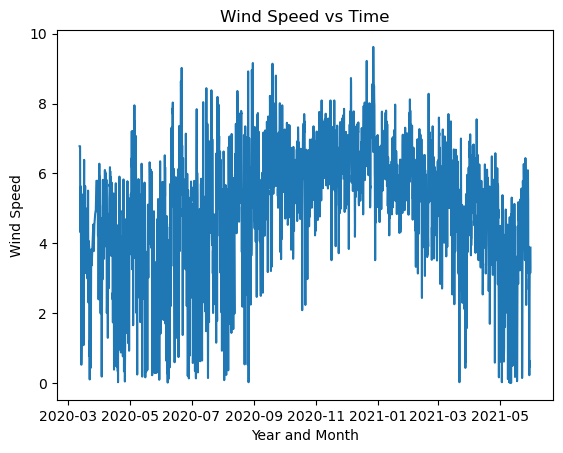

In [15]:
#plotting graph of windspeed vs time
x_axis = df['timestamp']
y_axis = df['wind speed']
plt.plot(x_axis, y_axis)
plt.title('Wind Speed vs Time')
plt.xlabel('Year and Month')
plt.ylabel('Wind Speed')
plt.show()

# Linear Regression Model


In [16]:
X = df[['Year', 'Month', 'Date', 'Hour', 'wind direction']]
y = df['wind speed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.107470076661537


In [20]:
y_test

4830     5.94
3771     6.53
1523     4.41
3393     5.50
4169     5.43
         ... 
9869     3.52
10061    3.40
6911     7.94
8616     5.66
8988     4.86
Name: wind speed, Length: 2137, dtype: float64

In [21]:
# Convert y_test and y_pred to DataFrames for easy comparison
y_test_df = pd.DataFrame({'Actual wind speed': y_test.values})
y_pred_df = pd.DataFrame({'Predicted wind speed': y_pred})

# Combine the DataFrames and print side by side
comparison_df = pd.concat([y_test_df, y_pred_df], axis=1)
print(comparison_df)

      Actual wind speed  Predicted wind speed
0                  5.94              5.516693
1                  6.53              5.229303
2                  4.41              4.790179
3                  5.50              5.140155
4                  5.43              5.190086
...                 ...                   ...
2132               3.52              5.342715
2133               3.40              5.639577
2134               7.94              6.006271
2135               5.66              5.016824
2136               4.86              4.594121

[2137 rows x 2 columns]


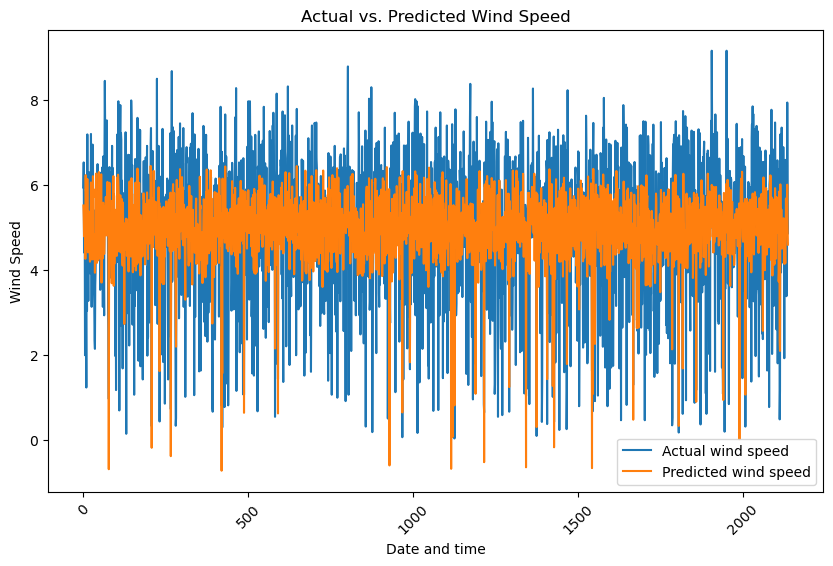

In [22]:
# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot( comparison_df['Actual wind speed'], label='Actual wind speed')
plt.plot( comparison_df['Predicted wind speed'], label='Predicted wind speed')
plt.xlabel('Date and time')
plt.ylabel('Wind Speed')
plt.title('Actual vs. Predicted Wind Speed')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# LSTM Model with respect to timestamp and wind speed


C:\Users\ABHISHEK PANCHAL\AppData\Local\Temp\ipykernel_21844\449478202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["wind speed"])


Text(0.5, 1.0, 'Wind Speed Prediction')

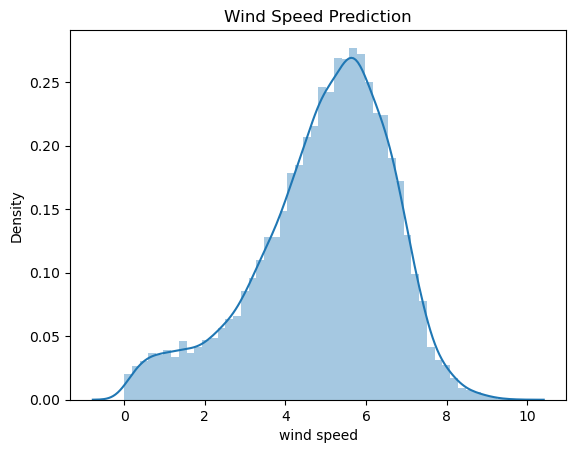

In [23]:
sns.distplot(df["wind speed"])
plt.title("Wind Speed Prediction")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


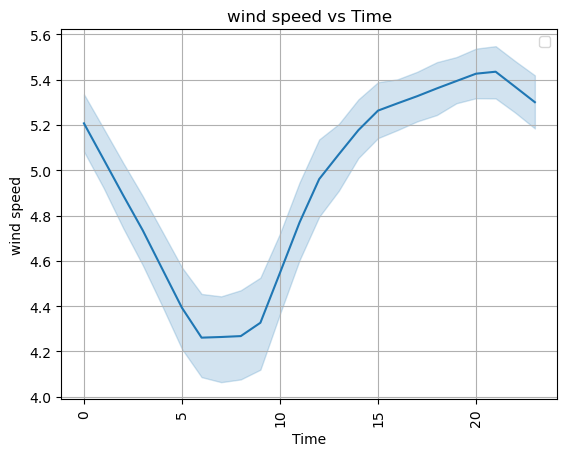

In [24]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=df["Hour"],y=df["wind speed"], data=df)
plt.title("wind speed vs Time")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [25]:
df

,timestamp,wind speed,wind direction,Month,Year,Date,Hour
0,2020-03-12 12:00:00,6.78,90.02,3,2020,12,12
1,2020-03-12 13:00:00,6.78,90.02,3,2020,12,13
2,2020-03-12 14:00:00,6.78,90.02,3,2020,12,14
3,2020-03-12 15:00:00,6.78,90.02,3,2020,12,15
4,2020-03-12 16:00:00,6.78,90.02,3,2020,12,16
...,...,...,...,...,...,...,...
10676,2021-05-31 08:00:00,3.24,90.08,5,2021,31,8
10677,2021-05-31 09:00:00,3.28,90.08,5,2021,31,9
10678,2021-05-31 10:00:00,3.48,90.08,5,2021,31,10
10679,2021-05-31 11:00:00,3.68,90.07,5,2021,31,11


In [26]:
df.set_index('timestamp', inplace=True)

In [27]:
print("Old Dataset ",df.shape )

Old Dataset  (10681, 6)


In [28]:
df.head()

,wind speed,wind direction,Month,Year,Date,Hour
timestamp,,,,,,
2020-03-12 12:00:00,6.78,90.02,3,2020,12,12
2020-03-12 13:00:00,6.78,90.02,3,2020,12,13
2020-03-12 14:00:00,6.78,90.02,3,2020,12,14
2020-03-12 15:00:00,6.78,90.02,3,2020,12,15
2020-03-12 16:00:00,6.78,90.02,3,2020,12,16


In [29]:
TestData = df.tail(100)

Training_Set = df.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [30]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (10621, 1)
Test Set Shape  (100, 6)


In [31]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [32]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(10561, 60, 1)
(10561, 1)


In [33]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(10561, 60, 1)

In [34]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
331/331 [==============================] - 22s 52ms/step - loss: 0.0230
Epoch 2/50
331/331 [==============================] - 17s 50ms/step - loss: 0.0124
Epoch 3/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0070
Epoch 4/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0046
Epoch 5/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0036
Epoch 6/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0030
Epoch 7/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0025
Epoch 8/50
331/331 [==============================] - 16s 48ms/step - loss: 0.0022
Epoch 9/50
331/331 [==============================] - 16s 49ms/step - loss: 0.0021
Epoch 10/50
331/331 [==============================] - 16s 48ms/step - loss: 0.0018
Epoch 11/50
331/331 [==============================] - 16s 48ms/step - loss: 0.0017
Epoch 12/50
331/331 [==============================] - 16s 48ms/step - loss: 0.0016
E

In [36]:
TestData.head(2)

,wind speed,wind direction,Month,Year,Date,Hour
timestamp,,,,,,
2021-05-27 09:00:00,3.71,90.10,5,2021,27,9
2021-05-27 10:00:00,4.14,90.09,5,2021,27,10


In [37]:
TestData.shape

(100, 6)

In [38]:
df_Total = pd.concat((df[["wind speed"]], TestData[["wind speed"]]), axis=0)

In [39]:
df_Total.shape

(10781, 1)

In [40]:
inputs = df_Total[len(df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [41]:
inputs = df_Total[len(df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_wind_speed = regressor.predict(X_test)

4/4 [==============================] - 1s 14ms/step


In [42]:
# Do inverse Transformation to get Values
predicted_wind_speed = sc.inverse_transform(predicted_wind_speed)

In [43]:
True_wind_speed = TestData["wind speed"].to_list()
dates = TestData.index.to_list()

In [44]:
Machine_df = pd.DataFrame(data={
    "Date":dates,
    "True Wind Speed": True_wind_speed,
    "Predicted Wind Speed":[x[0] for x in predicted_wind_speed ]
})

In [45]:
Machine_df

,Date,True Wind Speed,Predicted Wind Speed
0,2021-05-27 09:00:00,3.71,3.870120
1,2021-05-27 10:00:00,4.14,3.497667
2,2021-05-27 11:00:00,4.58,4.447811
3,2021-05-27 12:00:00,5.01,5.020433
4,2021-05-27 13:00:00,5.24,4.827009
...,...,...,...
95,2021-05-31 08:00:00,3.24,3.074494
96,2021-05-31 09:00:00,3.28,3.194607
97,2021-05-31 10:00:00,3.48,3.213577
98,2021-05-31 11:00:00,3.68,3.542060


In [46]:
True_wind_speed = TestData["wind speed"].to_list()
predicted_wind_speed  = [x[0] for x in predicted_wind_speed ]
dates = TestData.index.to_list()

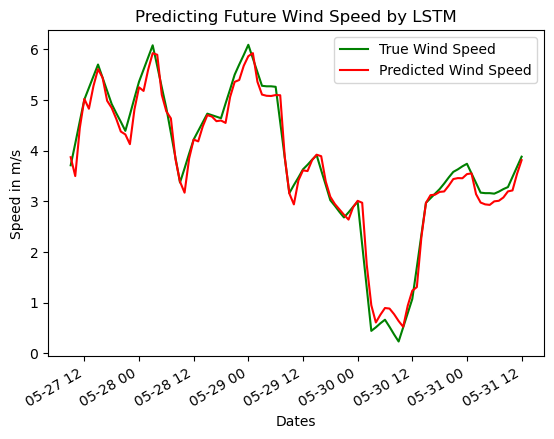

In [47]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_wind_speed
y1 = predicted_wind_speed

plt.plot(x, y, color="green", label="True Wind Speed")
plt.plot(x, y1, color="red", label="Predicted Wind Speed")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Speed in m/s")
plt.title("Predicting Future Wind Speed by LSTM")
plt.legend()

# LSTM model with respect to wind speed and wind direction


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


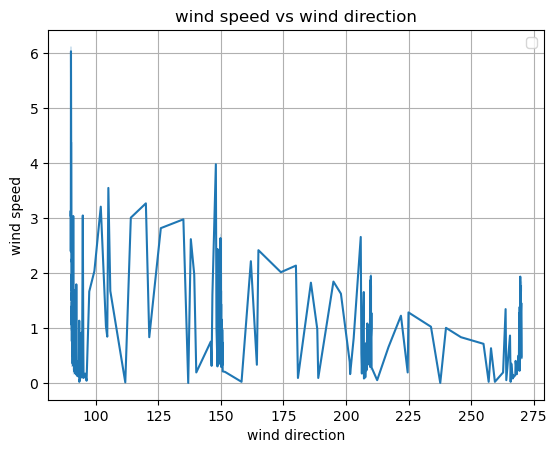

In [55]:
sns.lineplot(x=df["wind direction"],y=df["wind speed"], data=df)
plt.title("wind speed vs wind direction")
plt.xlabel("wind direction")
plt.grid(True, alpha=1)
plt.legend()

In [56]:
# Split the data into input (direction) and output (wind speed) variables
X = df['wind direction'].values.reshape(-1, 1)
y = df['wind speed'].values.reshape(-1, 1)
data_x = np.zeros([0,9])
data_y = np.zeros([0,1]) 

In [57]:
# Scale the input and output variables to the range [0, 1]
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [58]:
for i in range(4,np.array(X).shape[0]):
    A = [X_scaled[i-4,0], X_scaled[i-3,0], X_scaled[i-2,0], X_scaled[i-1,0], X_scaled[i,0], 
         y_scaled[i-4,0], y_scaled[i-3,0], y_scaled[i-2,0], y_scaled[i-1,0]]
    data_x = np.append(data_x,np.expand_dims(np.array(A),axis=0),axis=0)
    data_y = np.append(data_y,y_scaled[i-1,0])   

In [59]:
    #A = [X_scaled[i-6,0], X_scaled[i-5,0], X_scaled[i-4,0], X_scaled[i-3,0], X_scaled[i-2,0],X_scaled[i-1,0], X_scaled[i,0], y_scaled[i-6,0], y_scaled[i-5,0], y_scaled[i-4,0], y_scaled[i-3,0], y_scaled[i-2,0], y_scaled[i-1,0]]
    #data_x = np.append(data_x,np.expand_dims(np.array(A),axis=0),axis=0)
    #data_y = np.append(data_y,y_scaled[i-1,0])
    #A = [X_scaled[i-2,0], X_scaled[i-1,0], X_scaled[i,0], y_scaled[i-2,0], y_scaled[i-1,0]]
    #data_x = np.append(data_x,np.expand_dims(np.array(A),axis=0),axis=0)
    #data_y = np.append(data_y,y_scaled[i-1,0])
    #A = [X_scaled[i-1,0], X_scaled[i,0], y_scaled[i-1,0]]
    #data_x = np.append(data_x,np.expand_dims(np.array(A),axis=0),axis=0)
    #data_y = np.append(data_y,y_scaled[i-1,0])

In [61]:
import random
import os
import tensorflow as tf
os.environ['PYTHONHASHSEED'] = str(2021)
random.seed(2021)
tf.random.set_seed(2021)
initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=2021)

In [62]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [63]:
#Define the LSTM model
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, input_shape=(9, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
model.add(Dropout(0.05))
model.add(tf.keras.layers.Dense(units=1))

In [64]:
#Compile and train the model         
model.compile(loss='mean_squared_error',
              optimizer='adam')
checkpoint_filepath = 'tmp\checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
         filepath=checkpoint_filepath,
         save_weights_only=True,
         monitor='val_loss',
         mode='auto',
         save_best_only=True)
history = model.fit(X_train, y_train,
                    validation_data=(X_test,y_test),
                    epochs=30,
                    callbacks = model_checkpoint_callback,
                    batch_size=32)
model.load_weights(checkpoint_filepath)
loss= model.evaluate(X_train, y_train)
loss_val= model.evaluate(X_test, y_test)

Epoch 1/30
267/267 [==============================] - 7s 13ms/step - loss: 0.0195 - val_loss: 0.0031
Epoch 2/30
267/267 [==============================] - 3s 9ms/step - loss: 0.0024 - val_loss: 7.6232e-04
Epoch 3/30
267/267 [==============================] - 3s 10ms/step - loss: 9.1483e-04 - val_loss: 3.8474e-04
Epoch 4/30
267/267 [==============================] - 3s 10ms/step - loss: 6.0895e-04 - val_loss: 2.9333e-04
Epoch 5/30
267/267 [==============================] - 3s 10ms/step - loss: 4.6712e-04 - val_loss: 7.5457e-05
Epoch 6/30
267/267 [==============================] - 3s 10ms/step - loss: 4.5409e-04 - val_loss: 1.3987e-04
Epoch 7/30
267/267 [==============================] - 3s 10ms/step - loss: 3.7631e-04 - val_loss: 1.7658e-04
Epoch 8/30
267/267 [==============================] - 3s 9ms/step - loss: 3.8285e-04 - val_loss: 2.4824e-04
Epoch 9/30
267/267 [==============================] - 3s 11ms/step - loss: 2.9680e-04 - val_loss: 2.5582e-05
Epoch 10/30
267/267 [============

In [65]:
# Predict wind speeds for the test set
y_pred_scaled = model.predict(X_test)

67/67 [==============================] - 1s 3ms/step


In [66]:
# Inverse scale the predicted and actual wind speeds
y_pred_scaled = y_pred_scaled.reshape(1, -1)
y_test = y_test.reshape(1, -1)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_actual = scaler_y.inverse_transform(y_test)

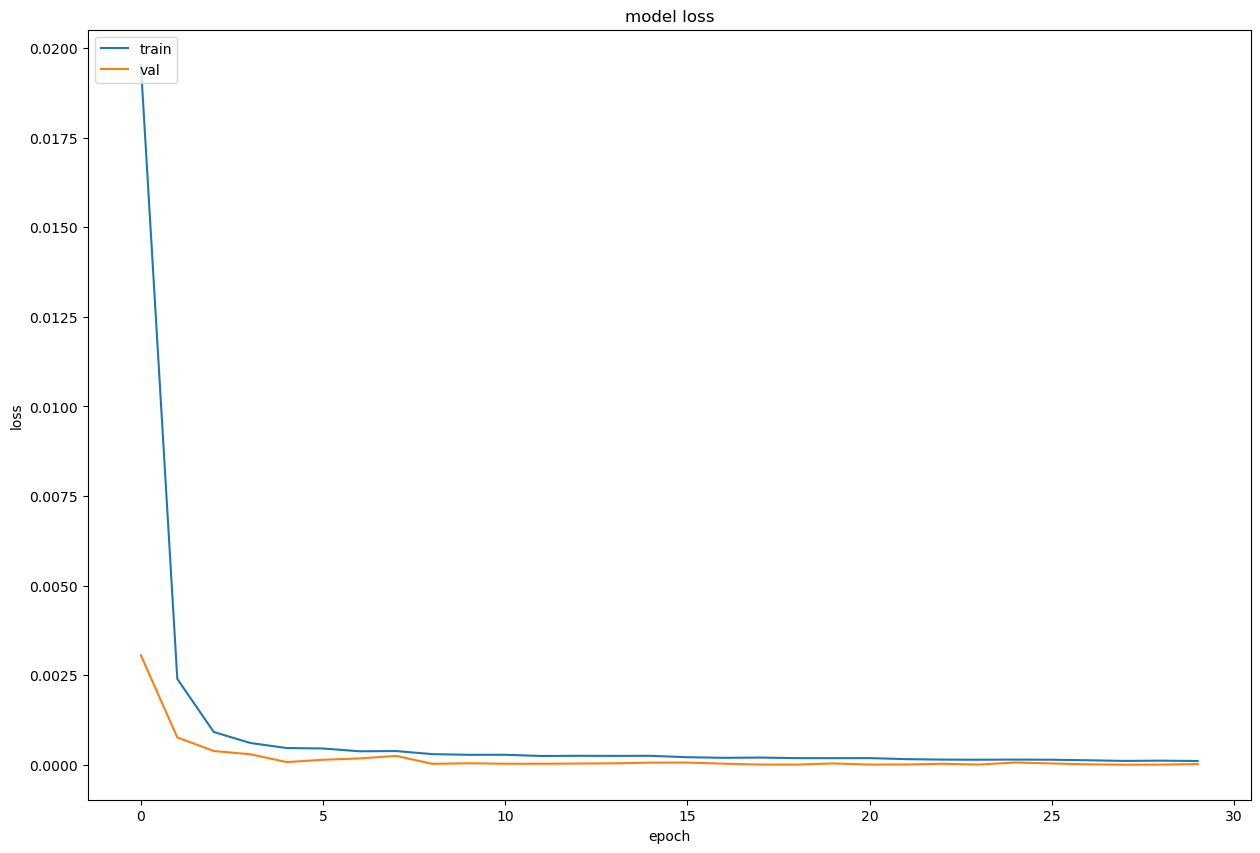

In [67]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [68]:
# Plotting Results
y_predicted = y_pred.flatten()
y_actuall = y_actual.flatten()
table = pd.DataFrame({'y_pred': y_predicted, 'y_actual': y_actuall})
print(table)
plt.figure(figsize=(10, 6))  # Set the figure size

        y_pred  y_actual
0     6.296201      6.30
1     4.998743      5.00
2    -0.003602      0.01
3     0.787557      0.85
4     4.697282      4.70
...        ...       ...
2131  4.582798      4.58
2132  5.432770      5.43
2133  4.730248      4.73
2134  5.250339      5.25
2135  5.188203      5.19

[2136 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

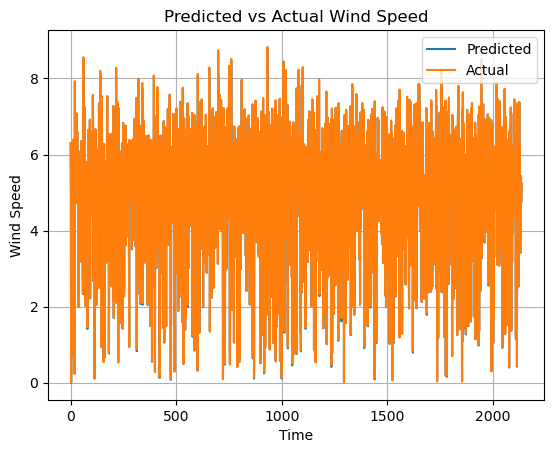

In [69]:
# Plot the predicted and actual wind speeds
plt.plot(y_pred[0], label='Predicted')
plt.plot(y_actual[0], label='Actual')
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title('Predicted vs Actual Wind Speed')
plt.legend()
plt.grid(True)

In [73]:
# Show the plot
plt.show()